**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

# Make sure to have the added images of my Directory that are in "pics" Folder  <-------------------------

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [18]:
# Building dic on a different cell for true profiling
dic_logs = {}

In [19]:
%%time
# gemini-2.5-flash-lite
input_prompt = ["What is a set to fail in bobybuilding"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))
dic_logs["model_1"] = logs

In bodybuilding, a **"set to fail"** refers to a set of repetitions where you perform as many repetitions as possible with good form until you can no longer complete another full, controlled repetition.

Here's a breakdown of what that means and why it's important:

**Key Characteristics of a Set to Fail:**

*   **Maximum Effort:** You are pushing your muscles to their absolute limit for that particular set.
*   **Repetition Failure:** The set ends when you can no longer lift the weight through the full range of motion with proper technique. This doesn't mean you can't move the weight at all, but rather that you can't complete another *effective* rep.
*   **Good Form is Crucial:** This is a critical distinction. "Failing" with sloppy form or by using momentum (cheating) is not the same as failing with good form. The goal is to stimulate the muscle, not to injure yourself.
*   **Subjective:** What constitutes "failure" can be somewhat subjective and depend on your individual strength, fatigue levels, and the specific exercise.

**Why is "Set to Fail" Used in Bodybuilding?**

The primary reason bodybuilders incorporate sets to failure is to maximize **muscle hypertrophy** (muscle growth). Here's how it contributes:

1.  **Mechanical Tension:** Pushing to failure creates significant mechanical tension on the muscle fibers. This tension is a key driver of muscle protein synthesis, the process by which muscles repair and grow.
2.  **Metabolic Stress:** When you go to failure, you often accumulate metabolic byproducts (like lactate) within the muscle. This "pump" and metabolic stress can also contribute to hypertrophy.
3.  **Motor Unit Recruitment:** As you fatigue during a set, your body is forced to recruit more and more motor units (nerve cells that control muscle fibers) to try and complete the repetitions. Reaching failure ensures that you've maximally recruited the available motor units for that set.
4.  **Progressive Overload:** Consistently pushing yourself to failure (or close to it) is a way to ensure you are progressively overloading your muscles, forcing them to adapt and grow stronger.

**Important Considerations and Nuances:**

*   **Not Every Set Needs to Be to Failure:** While effective, training to failure on every single set can lead to:
    *   **Overtraining:** Excessive fatigue, reduced performance, and increased risk of injury.
    *   **CNS Fatigue:** Central Nervous System fatigue, which can impact your overall training capacity.
    *   **Diminishing Returns:** The benefits of going to absolute failure might not be as significant on every set compared to the first few challenging sets.
*   **Exercise Selection:** Some exercises are safer to take to failure than others. Compound exercises like squats and deadlifts carry a higher risk of injury if form breaks down completely. Isolation exercises (like bicep curls or triceps extensions) are generally safer to push to failure.
*   **Experience Level:** Beginners might benefit more from learning proper form and not necessarily going to absolute failure on every set. More experienced lifters can better gauge their limits and recover from failure training.
*   **Periodization:** Bodybuilders often incorporate periods of training to failure within their overall training plan, interspersed with periods of less intense training.
*   **"Reps in Reserve" (RIR):** Many modern training philosophies advocate for training with a certain number of "reps in reserve" (RIR). For example, if you can do 10 reps but stop at 8, you have 2 RIR. Training with 0-2 RIR is often considered sufficient for hypertrophy, and absolute failure (0 RIR) might not always be necessary.

**In summary, a "set to fail" in bodybuilding is a set where you perform as many repetitions as possible with good form until you can't complete another rep. It's a powerful tool for muscle growth, but it should be used strategically and not necessarily on every single set to avoid overtraining and injury.**

CPU times: total: 31.2 ms
Wall time: 3.47 s


In [20]:
%%time
# gemini-2.5-pro
input_prompt = ["What is a set to fail in bobybuilding"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True,model_name="gemini-2.5-pro")
display(Markdown(text_response))
dic_logs["model_2"] = logs



Of course! This is a fundamental concept in bodybuilding and strength training. Let's break it down.

### Simple Definition

A **set to failure** in bodybuilding is the act of performing repetitions (reps) of an exercise until you physically cannot complete another full repetition **with proper form**.

Think of it like trying to push a car that has run out of gas. You push and push, and each step gets harder until you reach a point where, despite your maximum effort, you simply can't move it another inch. That's failure.

---

### What It Looks Like in Practice

Let's use a bicep curl as an example:

*   **Reps 1-5:** Feel relatively easy. You're in control.
*   **Reps 6-8:** The difficulty increases. You have to focus more.
*   **Reps 9-10:** These are a real struggle. Your muscle is burning, and the speed of the lift slows down significantly.
*   **Rep 11 (The "Failure" Rep):** You try to lift the weight, but you can only get it halfway up before your bicep gives out and you can't complete the movement, no matter how hard you try.

You have now completed a set of 10 reps to "muscular failure."

---

### The "Why": The Science Behind It

Training to failure is a popular technique because it's believed to be a powerful stimulus for muscle growth (hypertrophy). The theory is based on three main principles:

1.  **Maximum Muscle Fiber Recruitment:** Your muscles are made of different types of fibers. Your body is efficient and only uses as many as it needs. The easy reps use smaller, weaker fibers. As the set gets harder, your brain is forced to recruit more and more fibers, including the largest, strongest ones that have the most potential for growth. The final, near-impossible reps are where you guarantee you've activated all of them.

2.  **Metabolic Stress:** The intense burning sensation you feel during those last few reps is a result of metabolic byproducts (like lactate) building up in the muscle. This metabolic stress is one of the key chemical signals that tells your body, "This muscle was pushed to its absolute limit; we need to rebuild it bigger and stronger to handle this stress next time."

3.  **Mechanical Tension:** This refers to the physical force placed on the muscle fibers. By taking a set to failure, you ensure that you have subjected the muscle to the maximum possible tension for that given weight over the duration of the set.

---

### Important: Types of Failure

Not all "failure" is the same. It's crucial to understand the difference for safety and effectiveness.

*   **Technical Failure:** This is when your form starts to break down. For example, on a bicep curl, you start swinging your back to lift the weight. **This is the point where most people should stop the set.** Continuing past this point dramatically increases the risk of injury.
*   **Muscular Failure (or Concentric Failure):** This is the classic definition described above. Your form is still good, but you simply cannot complete the positive (lifting) portion of the rep.
*   **Absolute Failure:** This is when the muscle can't do *anything*—it can't even lower the weight under control (the eccentric/negative part). This is an extremely advanced and risky technique, often requiring a spotter for "forced reps."

For 99% of people, aiming for **technical or muscular failure** is the goal.

---

### Pros and Cons of Training to Failure

| Pros                                                              | Cons                                                                    |
| ----------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Potent Growth Stimulus:** Ensures you've maximally stimulated the muscle. | **High Risk of Injury:** If form breaks down, the risk of injury skyrockets. |
| **Time-Efficient:** You can get a great workout with fewer total sets. | **Taxes the Nervous System:** It's very fatiguing and can lead to overtraining. |
| **Builds Mental Toughness:** Teaches you to push through discomfort. | **Not Ideal for Strength:** Constantly failing can hinder pure strength gains. |
| **Guarantees High Effort:** You know you've given the set your all. | **Can Cause Excessive Soreness:** The DOMS (Delayed Onset Muscle Soreness) can be severe. |

---

### How to Use It Smartly

Training to failure is a powerful tool, but like any tool, it should be used correctly.

*   **Don't do it on every set.** A common strategy is to perform it only on the **last set** of an exercise.
*   **It's safer on some exercises than others.** Taking a machine leg extension or a cable bicep curl to failure is much safer than taking a heavy barbell squat or deadlift to failure.
*   **Listen to your body.** If you feel run down, overtrained, or your joints are aching, back off from failure training for a while.
*   **Beginners should be cautious.** New lifters should focus on mastering perfect form before they even think about pushing to true muscular failure.

In summary, a **set to failure** is a high-intensity technique where you push an exercise until you can't do one more rep with good form. It's a strong driver of muscle growth but must be used wisely to avoid injury and overtraining.

CPU times: total: 0 ns
Wall time: 28.8 s


In [21]:
# Comparision between the two different models
print("Logs for both models:\n")
counter = 1
token_per_model = []
for model, log in (dic_logs.items()):
    print(f"{counter}) {log['model']}")
    print(f'Out put tokens {log["output_tokens"]}')
    token_per_model.append(log["output_tokens"])
    counter += 1

token_dif =token_per_model[1] - token_per_model[0]

print(f"\n Pro model out put has {token_dif} more")

Logs for both models:

1) gemini-2.5-flash-lite
Out put tokens 855
2) gemini-2.5-pro
Out put tokens 1181

 Pro model out put has 326 more


In [22]:
"""
1) Performance:

I runned a small profiling on the functions of both models

In the test the performance was as follows:
-PRO = Approx 34.1 seconds
-FLASH LITE = Approx 3.38 seconds

Comment:
FLASH LITE running in only 9% of the time it took PRO
*Raw performance Number may vary per run but difference between them should be similar

2) Output Tokens:

-PRO = 1181 Tokens
-FLASH LITE = 855 Tokens

Comment:
Pro output 326 more tokens than FLASH LITE.
*Tokens per model ma vary per run but difference between them should be similar

3) Out put Quality: 

Both models were pretty informative and answers seems correct from a read, the main difference I can spot
is that PRO not only provided explanations but also examples and a table with pros and cons (in my run).
Seems pro will go the extra mile to provide more details and I would say more complete answers.


"""

'\n1) Performance:\n\nI runned a small profiling on the functions of both models\n\nIn the test the performance was as follows:\n-PRO = Approx 34.1 seconds\n-FLASH LITE = Approx 3.38 seconds\n\nComment:\nFLASH LITE running in only 9% of the time it took PRO\n*Raw performance Number may vary per run but difference between them should be similar\n\n2) Output Tokens:\n\n-PRO = 1181 Tokens\n-FLASH LITE = 855 Tokens\n\nComment:\nPro output 326 more tokens than FLASH LITE.\n*Tokens per model ma vary per run but difference between them should be similar\n\n3) Out put Quality: \n\nBoth models were pretty informative and answers seems correct from a read, the main difference I can spot\nis that PRO not only provided explanations but also examples and a table with pros and cons (in my run).\nSeems pro will go the extra mile to provide more details and I would say more complete answers.\n\n\n'

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [23]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [24]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [25]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [26]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [27]:
# Answer here
from pydantic import BaseModel
# structure schema 

# Subsections on the topics we query
class Subsection(BaseModel):
    superpowers_name: str
    superpowers_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    character_name: str
    superpowers: list[Subsection]


input_prompt = ["Which are the main characters (Villian and heroes) of the anime series My Hero Academia and what are their three main superpowers?"]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "character_name": "Izuku Midoriya (Deku)",
    "superpowers": [
      {
        "superpowers_name": "One For All",
        "superpowers_explanation": "A transferable Quirk that grants the user immense physical strength, speed, and durability. It can also be \"charged\" to unleash devastating blows like the \"Delaware Smash\" and \"Detroit Smash.\""
      },
      {
        "superpowers_name": "Fa Jin",
        "superpowers_explanation": "Allows the user to store kinetic energy by moving around and then release it in a burst of power, enhancing their subsequent attacks."
      },
      {
        "superpowers_name": "Danger Sense",
        "superpowers_explanation": "An instinctive precognitive Quirk that alerts the user to danger, allowing them to react before it happens."
      }
    ]
  },
  {
    "character_name": "Katsuki Bakugo",
    "superpowers": [
      {
        "superpowers_name": "Explosion",
        "superpowers_explanation": "Allows the user to generate nitroglyce

In [28]:
import json
# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
# So now we have an object that we can explore/use in a pythonic way for our purposes
for character in structured_resp:
    print(character["character_name"], "\n")
    # We can access each subsection as well
    for power in character["superpowers"]:
        print("\t", power["superpowers_name"], "\n")
        print("\t\t", power["superpowers_explanation"], "\n")

Izuku Midoriya (Deku) 

	 One For All 

		 A transferable Quirk that grants the user immense physical strength, speed, and durability. It can also be "charged" to unleash devastating blows like the "Delaware Smash" and "Detroit Smash." 

	 Fa Jin 

		 Allows the user to store kinetic energy by moving around and then release it in a burst of power, enhancing their subsequent attacks. 

	 Danger Sense 

		 An instinctive precognitive Quirk that alerts the user to danger, allowing them to react before it happens. 

Katsuki Bakugo 

	 Explosion 

		 Allows the user to generate nitroglycerin-like sweat in their palms and ignite it to create explosions of varying sizes and intensities. 

	 Enhanced Strength and Agility 

		 While not a distinct Quirk, Bakugo possesses exceptional physical capabilities that complement his Explosion Quirk, allowing for powerful aerial maneuvers and close-quarters combat. 

	 Strategic Combat 

		 Bakugo's ability to creatively and effectively utilize his Explo

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [29]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [30]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [31]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [32]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [33]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 300.62 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|█████████▉| 8.58k/8.58k [00:00<00:00, 403kB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [34]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [35]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [ ]:
# Answer here

import pymupdf
# Extract text from the PDF and format it for the prompt

#---------------------------------------------------------------
# This is a review from the Anime Attack on Titan
# File was saved in the same Directory as the example 
#---------------------------------------------------------------

pdf_path = r".\data\documents\aot_reviews.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

print(formatted_text)

✓ Extracted text from '.\data\documents\aot_reviews.pdf'
**Page 1**
"""
Ratings
Show all
Sort by
Featured
10
/10
Genuinely the greatest show I have ever seen
*NO SPOILERS IN MY REVIEW*
I can't put into words the the emotions I felt when watching this show over the course of two months. It
honestly completely took over my entire life and personality, and it was all I could think about...
There's never been a show with as many plot twists as this, as deep of emotional connections to the
characters through the screen as this, or written greatness as this.
But know that every single detail should not go unnoticed. Every single word that the characters say.
EVERYTHING is foreshadowing, and the circular storytelling is revolutionary like no other.
Hands down, this is the most incredible show with incredible characters, storytelling, and attention to
detail. Do yourself a favor and immerse yourself in this story.
Helpful
•
255
10
avabruner-91243Nov 25, 2024Permalink
10
/10
AOT: The Greatest A

In [41]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

In [42]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [45]:
# Different file name to avoid overwriting
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_exercise")

Extracted 65 entities:

• opinion_statement: 'Genuinely the greatest show I have ever seen'
  - subject: The show
  - sentiment: Positive
  - key_phrase: greatest show
• audience_impact: 'it honestly completely took over my entire life and personality, and it was all I could think about'
  - emotion_evoked: ['obsession', 'fascination']
  - causal_element: The show
  - target_audience: the reviewer
• opinion_statement: 'never been a show with as many plot twists as this, as deep of emotional connections to the characters through the screen as this, or written greatness as this'
  - subject: The show
  - sentiment: Positive
  - key_phrase: many plot twists, deep emotional connections, written greatness
• opinion_statement: 'Every single word that the characters say. EVERYTHING is foreshadowing, and the circular storytelling is revolutionary like no other'
  - subject: The show's storytelling
  - sentiment: Positive
  - key_phrase: revolutionary
• opinion_statement: 'this is the most incr

LangExtract: Saving to results\info_extractions\review_extraction_exercise.jsonl: 1 docs [00:00, ? docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_exercise.jsonl



LangExtract: Loading results\info_extractions\review_extraction_exercise.jsonl: 100%|█████████▉| 33.8k/33.8k [00:00<00:00, 1.16MB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_exercise.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_exercise_vis.html


In [46]:
html_content

In [48]:
# Comments <------------
""" 
Challenges:
The quality of the extracted information seems quite good considering the PDF I manage to get was not necessarily well formatted.
Was not that easy to get a direct source to download reviews directly to a PDF, most of them require the use of an API and download
in a programatic way which would defeat the purpose of the exercise because the information would already come structured in Json or similar.


Information:
From reading the extraction, it captured quite good the reviews and the sentiment being always positive due that those ratings were
all 10 out of 10 so if the extraction would had recognized as negative then it would have been concerning.

Improvements:
I think downloading in a programatic way API --> JSON would be a faster and more structured way to to get the data. Also this would 
make the data we give to the model be more determinstic in format. What I mean if we get the reviews from different sources and different
PDFs, their format wont be exactly the same when we pass to python.

"""


' \nChallenges:\nThe quality of the extracted information seems quite good considering the PDF I manage to get was not necessarily well formatted.\nWas not that easy to get a direct source to download reviews directly to a PDF, most of them require the use of an API and download\nin a programatic way which would defeat the purpose of the exercise because the information would already come structured in Json or similar.\n\n\nInformation:\nFrom reading the extraction, it captured quite good the reviews and the sentiment being always positive due that those ratings were\nall 10 out of 10 so if the extraction would had recognized as negative then it would have been concerning.\n\nImprovements:\nI think downloading in a programatic way API --> JSON would be a faster and more structured way to to get the data. Also this would \nmake the data we give to the model be more determinstic in format. What I mean if we get the reviews from different sources and different\nPDFs, their format wont be 

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [31]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [32]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\g_med\AppData\Local\Temp\ipykernel_6912\2000596105.py:14: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\g_med\AppData\Local\Temp\ipykernel_6912\2000596105.py:14: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [34]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [35]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [40]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [41]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [42]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [43]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
664,10664,“He who is slow to anger is better than the mi...,anger,0.314,"[values=[-0.0070954515, -0.002645255, -0.00250...","[-0.0070954515, -0.002645255, -0.0025068026, -..."
727,10727,@lethargytyler ehhh I guess. I want to everyon...,anger,0.333,"[values=[-0.020777116, 0.016601637, -0.0006963...","[-0.020777116, 0.016601637, -0.0006963124, -0...."
578,10578,If i could just get my line to block! #germant...,anger,0.417,"[values=[-0.015552189, -0.020527845, 0.0243825...","[-0.015552189, -0.020527845, 0.024382573, -0.0..."
655,10655,"@rabpeel snap, seems to be a problem here",anger,0.375,"[values=[-0.0075950185, 0.023676248, 0.0058576...","[-0.0075950185, 0.023676248, 0.0058576595, -0...."
851,10851,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.125,"[values=[-0.003051374, -0.02106107, 0.00459521...","[-0.003051374, -0.02106107, 0.0045952178, -0.0..."
...,...,...,...,...,...,...
3280,40453,Cheap pout my brodcast,sadness,0.438,"[values=[0.019471357, -0.008887154, -0.0133207...","[0.019471357, -0.008887154, -0.013320768, -0.0..."
3000,40173,#Terencecutcher #Tulsa the man onthe helicopte...,sadness,0.667,"[values=[-0.031287823, 0.0034440726, 0.0073464...","[-0.031287823, 0.0034440726, 0.007346433, -0.0..."
3463,40636,Had a dream last night that Chris Brown create...,sadness,0.312,"[values=[0.019214084, -0.0045548254, -0.005232...","[0.019214084, -0.0045548254, -0.0052329334, -0..."
3447,40620,LOL! @TheFrankJLopes was just awarded the “F” ...,sadness,0.321,"[values=[0.008707329, 0.030970886, 0.022219863...","[0.008707329, 0.030970886, 0.022219863, -0.080..."


In [44]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
227,30856,Each day is what you make of it! #goals #chall...,joy,0.423,"[values=[-0.015364312, 0.01443328, 0.003991061...","[-0.015364312, 0.01443328, 0.003991061, -0.072..."
147,21210,Another fun fact: i am afraid,fear,0.667,"[values=[-0.01226142, -0.00048677987, -0.01031...","[-0.01226142, -0.00048677987, -0.010317536, -0..."
33,10890,All Brian does is sleep and aggravate me,anger,0.833,"[values=[-0.016705524, -0.008376931, -0.018700...","[-0.016705524, -0.008376931, -0.01870026, -0.0..."
200,30829,@Casper10666 I assure you there is no laughter...,joy,0.167,"[values=[-0.008917223, -0.013621849, 0.0017390...","[-0.008917223, -0.013621849, 0.0017390692, -0...."
56,10913,@fluffysoftlouis no no. I insist that you give...,anger,0.562,"[values=[-0.005988847, 0.028879639, -0.0112791...","[-0.005988847, 0.028879639, -0.011279167, -0.0..."
335,40848,It's basically a dead skin peel which sounds g...,sadness,0.354,"[values=[0.026134387, 0.0031602613, -0.0021065...","[0.026134387, 0.0031602613, -0.0021065692, -0...."
118,21181,@AlaskaGurus @adventuretweets agreed! 😍 an awe...,fear,0.208,"[values=[-0.03000513, -0.024266208, 0.01600963...","[-0.03000513, -0.024266208, 0.01600963, -0.072..."
275,40788,A .500 season is all I'm looking for at this p...,sadness,0.688,"[values=[-0.0032239598, -0.004467329, -0.00803...","[-0.0032239598, -0.004467329, -0.008030476, -0..."
235,30864,@diehimbeertonis She developed her 'forced smi...,joy,0.208,"[values=[0.0023312648, 0.019491544, -0.0150602...","[0.0023312648, 0.019491544, -0.015060243, -0.0..."
68,10925,"Anger, resentment, and hatred are the destroye...",anger,0.375,"[values=[0.006805829, 0.009590601, -0.00079551...","[0.006805829, 0.009590601, -0.0007955102, -0.0..."


In [45]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [46]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [47]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [49]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

c:\Users\g_med\anaconda3\envs\Lab2\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [59]:
df_plot

,UMAP1,UMAP2,emotion,intensity,text
0,5.429345,4.924314,anger,0.314,“He who is slow to anger is better than the mi...
1,7.889476,5.570574,anger,0.333,@lethargytyler ehhh I guess. I want to everyon...
2,7.022016,3.349280,anger,0.417,If i could just get my line to block! #germant...
3,7.399708,5.596839,anger,0.375,"@rabpeel snap, seems to be a problem here"
4,6.918068,3.216855,anger,0.125,@CorningFootball IT'S GAME DAY!!!! T MIN...
...,...,...,...,...,...
195,5.787071,4.022898,fear,0.438,@Evan_McMullin @TheBlazeRadio Classic SHITLIB ...
196,7.000835,3.358704,fear,0.300,It really is amazing the money they give to so...
197,5.756878,5.497814,anger,0.370,Sting is just too damn earnest for early morni...
198,5.838205,3.198496,fear,0.356,@soozclifford Sure have... Sydney are too toug...


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [ ]:
# Answer here

import plotly.express as px


# Apply UMAP for dimensionality reduction
reducer_3 = umap.UMAP(n_components=3, metric='cosine', random_state=28) 
embedding_3d = reducer_3.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']

fig = px.scatter_3d(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3', 
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Text Embeddings'
)
fig.show()



c:\Users\g_med\anaconda3\envs\Lab2\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



![plot 3 D](pics\3d.png)

Given the nature of LLM responses are non deterministic, I screen shot the actual result
so the comments make sense

# Comments <------------

the 2D plot and the 3D plot show quite different views, the 2D Plot seems to show the emotions clusters
are more separted from each other, even as if they mixed through the Y axis, in the X axis they seem to
be quite separeted, some colros remain mostly at the sart of X while others mostly at the end, at y level
as mentioned before, is more mixed. While at 3d plot, the four colors seem much more mixed and what is 
for me more interesting is that they create a view that is close to spherical, while the 2D was not 
so obvious the oval shape .



---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [63]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [66]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 168}


The key challenges in realizing AGI's full potential, as outlined in the provided text, revolve around ethical considerations and robust safeguards. These include:

*   **Bias and Fairness:** Ensuring that AGI algorithms are unbiased and treat everyone equally is crucial. This requires training AI models on diverse datasets and continuously monitoring their performance for any biases.
*   **Privacy:** Protecting user data is a top priority. This necessitates the implementation of strong privacy measures and transparent policies from companies regarding data usage.
*   **Accountability:** Establishing clear guidelines for responsibility for decisions made by AGI systems is essential. This involves creating legal frameworks that define accountability in cases of mistakes or harm caused by AI actions.

Addressing these factors through collaboration between researchers, policymakers, and industry leaders is vital to ensure AGI benefits society while minimizing potential risks.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [68]:
# Answer here
url="https://www.investopedia.com/leveraged-volatility-etf-11714205"
# Create the retriever
retriever_ex = load_and_retrieve_docs(url)

# Use the RAG chain
result_ex = rag_chain(question="What is a volatility etf and does it rely on the vix", retriever=retriever_ex)
display(Markdown(result_ex))

# Comments <------------
"""
The Response using the RAG was quite accurate comparaed to what the URL says. The question was quite
specific and simple so the model did a great job answering it.

"""

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 431, 'output_tokens': 123}


A volatility ETF is a type of exchange-traded fund that targets market volatility, which is a measure of how large and frequent price changes occur in the market, rather than the market's direction. These ETFs allow investors to trade market uncertainty by providing exposure to anticipated fluctuations.

Most volatility ETFs do rely on the CBOE Volatility Index (VIX) or similar indexes. However, investors cannot invest directly in the VIX itself because it is a calculated measure, not an asset. Instead, volatility ETFs gain their exposure to the VIX or similar indexes through the use of futures or other derivative contracts.

'\nThe Response using the RAG was quite accurate comparaed to what the URL says. The question was quite\nspecific and simple so the model did a great job answering it.\n\n'

# Actual answer in the URL <---

![Wikipedia](pics/rag_ex.png)

source: https://www.investopedia.com/leveraged-volatility-etf-11714205

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [12]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:03,  1.40it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.94 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:08,  1.21it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.31 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.32it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.89 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.34 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:58<00:04,  1.20it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.74 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 58.75%
              precision    recall  f1-score   support

       anger       0.48      0.70      0.57        20
        fear       1.00      0.45      0.62        20
         joy       0.57      0.80      0.67        20
     sadness       0.57      0.40      0.47        20

    accuracy                           0.59        80
   macro avg       0.66      0.59      0.58        80
weighted avg       0.66      0.59      0.58        80



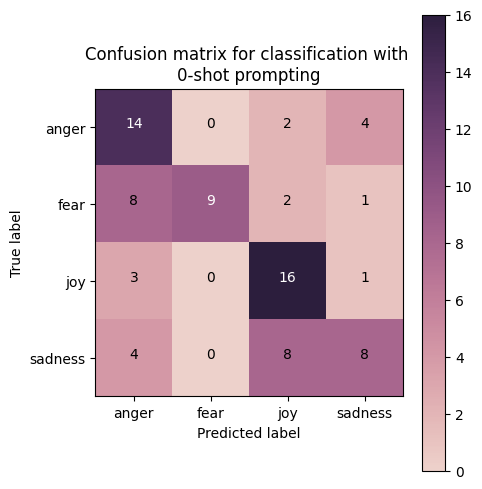

In [14]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Just paid for chicken at @panerabread and didn't even get any 😑😑😑 there goes 4 dollars and me as a customer 
Class: anger

Text: @hotpatooties more like quickie divorce #awful
Class: fear

Text: @ContourCosmetic well done ladies! A great award for an amazing team. A delight to present the award to you.
Class: joy

Text: @delhi_lawyer @BhagwanUvach @ShivAroor sad . This is not film story. Who knows could be ploy to escalate tension. Unverified report no hype
Class: sadness




Processing samples for emotion: anger...:   0%|          | 0/20 [00:00<?, ?it/s]

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:10<00:03,  1.46it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.08 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:06,  1.46it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.08 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.97 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.06 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.18it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.58 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:52<00:00,  5.63s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 63.75%
              precision    recall  f1-score   support

       anger       0.59      0.65      0.62        20
        fear       0.85      0.55      0.67        20
         joy       0.60      0.75      0.67        20
     sadness       0.60      0.60      0.60        20

    accuracy                           0.64        80
   macro avg       0.66      0.64      0.64        80
weighted avg       0.66      0.64      0.64        80



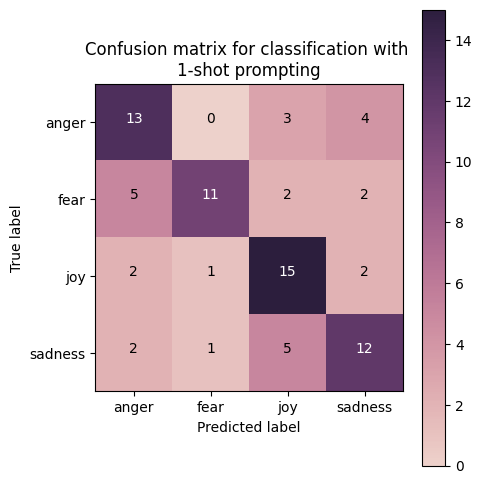

In [15]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Just paid for chicken at @panerabread and didn't even get any 😑😑😑 there goes 4 dollars and me as a customer 
Class: anger

Text: What terrible thing to see and have no vision-\n\nHelen Keller-\n\n-Begin with the end in mind-\n\nStephen Covey-\n\n #whereareugoing 
Class: anger

Text: You a fuck boy if you run drag routes back to back in madden
Class: anger

Text: @ShieldsCap &lt; Steve between his feet, feeling a blush sting his cheeks. 'I can undress myself, thank you very much,' he snapped &gt;
Class: anger

Text: @kingcharles9th i Lowkey forgot you had twitter and if you don't follow me back im gonna be #offended
Class: anger

Text: @hotpatooties more like quickie divorce #awful
Class: fear

Text: @Taoist_Skeptic @jackaberlin @DrJillStein @politicususa Doubt U have anything to be afraid o

Processing samples for emotion: anger...:   0%|          | 0/20 [00:00<?, ?it/s]

Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:07<00:06,  1.36it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 18.645475498s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:25<00:11,  2.29s/it]

Rate limit of 15 requests per minute reached. Waiting for 34.05 seconds.


Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:04<00:08,  1.52it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 17.931601028s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:22<00:30,  3.06s/it]

Rate limit of 15 requests per minute reached. Waiting for 33.82 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.34 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.73 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.10it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.94 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:52<00:00,  5.63s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 63.75%
              precision    recall  f1-score   support

       anger       0.56      0.70      0.62        20
        fear       0.77      0.50      0.61        20
         joy       0.70      0.70      0.70        20
     sadness       0.59      0.65      0.62        20

    accuracy                           0.64        80
   macro avg       0.66      0.64      0.64        80
weighted avg       0.66      0.64      0.64        80



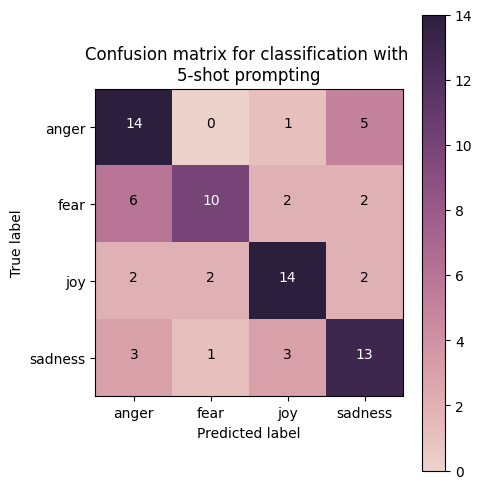

In [16]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

## Comparing results of the different prompting methods
![Comparision](pics/results.png)

1) ZERO SHOT                             2) ONE SHOT                                    3) FEW SHOT                       

Given the nature of LLM responses are non deterministic, I screen shot the actual result
so the comments make sense

# Answer here
### Comments <------------

The accuracy improved with shots, both 1 shot and few shot had better performance over zero shot but the results by emotions vary. Accuracy
is relevant here because all four classes are balanced.

Across the board, fear seems to be the hardest emotion to recall, all 3 prompts struggled with it, providing shots did improve the recall,
I think helps with recognizing it and seeing that 1 and few shots decreased precision but improve recall, tells me the model started
forecasting more fear label while zero shot was very conservative with it.

1 and few shots traided punches when it comes to recall, increased in anger and sadness but decreade in joy and fear both increased and decreased
by same amounts so basically they ended tied, their accuracies are basically the same  and samein F1-SCORE some went lower some higher but
overall the effect was almost null.

The next text would be if by trying to increase the number of shots we can get better results or it will start overfitting and we reached a platau.




---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

# Zero Shot ----------------------

In [169]:
# Answer here
import pandas as pd

zero_shot_results_df = pd.read_csv(r"C:\Users\g_med\py_scripts\DM2025Labs\DM2025-Lab2-Exercise\results\llm_classification_results\results_samples_20_shots_0.csv")

cf_matrix_zero = pd.crosstab(zero_shot_results_df["true_emotion"], zero_shot_results_df["predicted_emotion"], rownames=['Actual'], colnames=['Predicted'], margins=True)

print("\nConfusion Matrix:\n", cf_matrix_zero)


Confusion Matrix:
 Predicted  anger  fear  joy  sadness  All
Actual                                   
anger         14     0    2        4   20
fear           8     9    2        1   20
joy            3     0   16        1   20
sadness        4     0    8        8   20
All           29     9   28       14   80


In [170]:
# Generating the indexes of equal and not equal predictions

zero_shot_results_df["result"] = zero_shot_results_df["true_emotion"] == zero_shot_results_df["predicted_emotion"]

zero_not_equal = (zero_shot_results_df[zero_shot_results_df["result"] == False].index)       
zero_equal = (zero_shot_results_df[zero_shot_results_df["result"] == True].index) 

print("zero_not_equal index\n",zero_not_equal)
print("zero_equal index\n",zero_equal)


zero_not_equal index
 Index([ 0,  1,  3,  4, 12, 17, 20, 21, 23, 25, 29, 30, 31, 32, 34, 36, 37, 46,
       47, 51, 55, 62, 64, 65, 68, 69, 70, 72, 73, 74, 77, 78, 79],
      dtype='int64')
zero_equal index
 Index([ 2,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 18, 19, 22, 24, 26, 27,
       28, 33, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 52, 53, 54, 56,
       57, 58, 59, 60, 61, 63, 66, 67, 71, 75, 76],
      dtype='int64')


## One Shot ---------------------------

In [166]:

one_shot_results_df = pd.read_csv(r"C:\Users\g_med\py_scripts\DM2025Labs\DM2025-Lab2-Exercise\results\llm_classification_results\results_samples_20_shots_1.csv")

cf_matrix_one = pd.crosstab(one_shot_results_df["true_emotion"], one_shot_results_df["predicted_emotion"], rownames=['Actual'], colnames=['Predicted'], margins=True)

print("\nConfusion Matrix:\n", cf_matrix_one)


Confusion Matrix:
 Predicted  anger  fear  joy  sadness  All
Actual                                   
anger         13     0    3        4   20
fear           5    11    2        2   20
joy            2     1   15        2   20
sadness        2     1    5       12   20
All           22    13   25       20   80


In [171]:
# Generating the indexes of equal and not equal predictions
one_shot_results_df["result"] = one_shot_results_df["true_emotion"] == one_shot_results_df["predicted_emotion"]

one_not_equal = (one_shot_results_df[one_shot_results_df["result"] == False].index)       
one_equal = (one_shot_results_df[one_shot_results_df["result"] == True].index) 

print("one_not_equal index\n",one_not_equal)
print("one_equal index\n",one_equal)

one_not_equal index
 Index([ 0,  1,  2,  4,  9, 12, 17, 20, 21, 25, 29, 30, 31, 32, 36, 37, 46, 47,
       51, 55, 57, 62, 64, 68, 69, 70, 73, 77, 79],
      dtype='int64')
one_equal index
 Index([ 3,  5,  6,  7,  8, 10, 11, 13, 14, 15, 16, 18, 19, 22, 23, 24, 26, 27,
       28, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 52, 53, 54,
       56, 58, 59, 60, 61, 63, 65, 66, 67, 71, 72, 74, 75, 76, 78],
      dtype='int64')


## Few Shot ---------------------------

In [165]:
few_shot_results_df = pd.read_csv(r"C:\Users\g_med\py_scripts\DM2025Labs\DM2025-Lab2-Exercise\results\llm_classification_results\results_samples_20_shots_5.csv")

cf_matrix_few = pd.crosstab(few_shot_results_df["true_emotion"], few_shot_results_df["predicted_emotion"], rownames=['Actual'], colnames=['Predicted'], margins=True)

print("\nConfusion Matrix:\n", cf_matrix_few)


Confusion Matrix:
 Predicted  anger  fear  joy  sadness  All
Actual                                   
anger         14     0    1        5   20
fear           6    10    2        2   20
joy            2     2   14        2   20
sadness        3     1    3       13   20
All           25    13   20       22   80


In [172]:
# Generating the indexes of equal and not equal predictions
few_shot_results_df["result"] = few_shot_results_df["true_emotion"] == few_shot_results_df["predicted_emotion"]

few_not_equal = (few_shot_results_df[few_shot_results_df["result"] == False].index)       
few_equal = (few_shot_results_df[few_shot_results_df["result"] == True].index) 

print("few_not_equal index\n",few_not_equal)
print("few_equal index\n",few_equal)

few_not_equal index
 Index([ 0,  1,  2, 12, 16, 17, 20, 21, 23, 25, 29, 30, 31, 32, 36, 37, 46, 47,
       51, 55, 57, 58, 62, 64, 68, 69, 70, 73, 79],
      dtype='int64')
few_equal index
 Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 18, 19, 22, 24, 26, 27,
       28, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 52, 53, 54,
       56, 59, 60, 61, 63, 65, 66, 67, 71, 72, 74, 75, 76, 77, 78],
      dtype='int64')


# Combining Sets

In [222]:
summary_dic_sets = {}

In [223]:
# SET 1

# Succceded means it forecasted correctly while Failed means forecast was incorrect

# Getting a set where both one and few shot failed
one_few_not_equal_shared = one_not_equal.intersection(few_not_equal)
# Getting a set where both one and few shot failed but zero-shot succeeded
zero_equal_vs_one_few_not_shared = zero_equal.intersection(one_few_not_equal_shared)
emotion_list_set1 = []

# Displaying the text that was found 
print("          -- |Text that succeed with zero and failed with few & one| --")
for  num ,index in enumerate(zero_equal_vs_one_few_not_shared):
    print(f"text # {num+1}: ",zero_shot_results_df.iloc[index]["text"])
    print(f"Succeed Emotion Zero : {zero_shot_results_df.iloc[index]['predicted_emotion']} == True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"Failed Emotion One : {one_shot_results_df.iloc[index]['predicted_emotion']} != True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"Failed Emotion Few : {few_shot_results_df.iloc[index]['predicted_emotion']} != True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print("---------------------------------------------------")
    emotion_list_set1.append(zero_shot_results_df.iloc[index]['true_emotion'])
    summary_dic_sets["Set_1"] = len(zero_equal_vs_one_few_not_shared)


          -- |Text that succeed with zero and failed with few & one| --
text # 1:  @TrueAggieFan oh so that's where Brian was! Where was my invite? 
Succeed Emotion Zero : anger == True Emotion anger
Failed Emotion One : joy != True Emotion anger
Failed Emotion Few : joy != True Emotion anger
---------------------------------------------------
text # 2:  @theclobra lol I thought maybe, couldn't decide if there was levity or not
Succeed Emotion Zero : joy == True Emotion joy
Failed Emotion One : sadness != True Emotion joy
Failed Emotion Few : sadness != True Emotion joy
---------------------------------------------------


In [224]:
# SET 2

# Succceded means it forecasted correctly while Failed means forecast was incorrect

# Getting a set where both one and few shot succeed
one_few_equal_shared = one_equal.intersection(few_equal)
# Getting a set where both one and few shot succeed but zero-shot failed
zero_not_vs_one_few__equal_shared = zero_not_equal.intersection(one_few_equal_shared)
emotion_list_set2 = []

# Displaying the text that was found
print("          -- |Text that improved with few & one and failed with zero| --")
for  num ,index in enumerate(zero_not_vs_one_few__equal_shared):
    print(f"text # {num+1}: ",zero_shot_results_df.iloc[index]["text"])
    print(f"Failed Emotion Zero : {zero_shot_results_df.iloc[index]['predicted_emotion']} != True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"Suceed Emotion One : {one_shot_results_df.iloc[index]['predicted_emotion']} == True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"Suceed Emotion Few : {few_shot_results_df.iloc[index]['predicted_emotion']} == True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print("---------------------------------------------------")
    emotion_list_set2.append(zero_shot_results_df.iloc[index]['true_emotion'])
    summary_dic_sets["Set_2"] = len(zero_not_vs_one_few__equal_shared)
    
    


          -- |Text that improved with few & one and failed with zero| --
text # 1:  @ArcticFantasy I would have almost took offense to this if I actually snapped you
Failed Emotion Zero : joy != True Emotion anger
Suceed Emotion One : anger == True Emotion anger
Suceed Emotion Few : anger == True Emotion anger
---------------------------------------------------
text # 2:  They'll be yo friend, shake your hand, then kick in yo door thas the way the game go🤖🤐.
Failed Emotion Zero : anger != True Emotion fear
Suceed Emotion One : fear == True Emotion fear
Suceed Emotion Few : fear == True Emotion fear
---------------------------------------------------
text # 3:  I can't WAIT to go to work tomorrow with a high as fuck fever. [sarcasm]\nHopefully I'll feel better tomorrow.\nBut I doubt it. #pessimism
Failed Emotion Zero : anger != True Emotion sadness
Suceed Emotion One : sadness == True Emotion sadness
Suceed Emotion Few : sadness == True Emotion sadness
----------------------------------

In [225]:
# SET 3

# Succceded means it forecasted correctly while Failed means forecast was incorrect

# Getting a set where both one and zero shot Failed
zero_one_not_equal_shared = zero_not_equal.intersection(one_not_equal)
# Getting a set where both one and zero shot failed but few succeeded
few_equal_vs_zero_one_not__equal_shared = few_equal.intersection(zero_one_not_equal_shared)
emotion_list_set3 = []
# Displaying the text that was found 
print("          -- |Text that improved with few  and failed with zero & one| -- ")
for  num ,index in enumerate(few_equal_vs_zero_one_not__equal_shared):
    print(f"text # {num+1}: ",zero_shot_results_df.iloc[index]["text"])
    print(f"Failed Emotion Zero : {zero_shot_results_df.iloc[index]['predicted_emotion']} != True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"Failed Emotion One : {one_shot_results_df.iloc[index]['predicted_emotion']} != True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"Suceed Emotion Few : {few_shot_results_df.iloc[index]['predicted_emotion']} == True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print("---------------------------------------------------")
    emotion_list_set3.append(zero_shot_results_df.iloc[index]['true_emotion'])
    summary_dic_sets["Set_3"] = len(few_equal_vs_zero_one_not__equal_shared)
    
    


          -- |Text that improved with few  and failed with zero & one| -- 
text # 1:  @fluffysoftlouis no no. I insist that you give me your best insult first
Failed Emotion Zero : joy != True Emotion anger
Failed Emotion One : joy != True Emotion anger
Suceed Emotion Few : anger == True Emotion anger
---------------------------------------------------
text # 2:  Might go on @RadioX tomorrow to hopefully win a new car. My current one stinks of gone off milk. #grim
Failed Emotion Zero : joy != True Emotion sadness
Failed Emotion One : joy != True Emotion sadness
Suceed Emotion Few : sadness == True Emotion sadness
---------------------------------------------------


In [226]:
# SET 4

# Succceded means it forecasted correctly while Failed means forecast was incorrect

# Getting a set where both one and zero shot succeeded
zero_one_equal_shared = zero_equal.intersection(one_equal)
# Getting a set where both one and zero shot succeed but few failed
few_not_equal_vs_zero_one_equal_shared = few_not_equal.intersection(zero_one_equal_shared)

emotion_list_set4 = []

# Displaying the text that was found 
print("          -- |Text that suceed with zero & few  and failed with few| -- ")
for  num ,index in enumerate(few_not_equal_vs_zero_one_equal_shared):
    print(f"text # {num+1}: ",zero_shot_results_df.iloc[index]["text"])
    print(f"True Emotion Zero : {zero_shot_results_df.iloc[index]['predicted_emotion']} == True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"True Emotion One : {one_shot_results_df.iloc[index]['predicted_emotion']} == True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print(f"False Emotion Few : {few_shot_results_df.iloc[index]['predicted_emotion']} != True Emotion {zero_shot_results_df.iloc[index]['true_emotion']}")
    print("---------------------------------------------------")
    emotion_list_set4.append(zero_shot_results_df.iloc[index]['true_emotion'])
    summary_dic_sets["Set_4"] = len(few_not_equal_vs_zero_one_equal_shared)
     



          -- |Text that suceed with zero & few  and failed with few| -- 
text # 1:  @RealJamesWoods @KennyCoble saddest part of this whole mess is that all of this #anger is #misdirected they should march 2 the #WhiteHouse
True Emotion Zero : anger == True Emotion anger
True Emotion One : anger == True Emotion anger
False Emotion Few : sadness != True Emotion anger
---------------------------------------------------
text # 2:  @GigaFag @pipertownsend_ snapchat new would beg to differ 
True Emotion Zero : joy == True Emotion joy
True Emotion One : joy == True Emotion joy
False Emotion Few : fear != True Emotion joy
---------------------------------------------------


# Summary

In [232]:


# Sorting the dictionary based on the values
sorted_dict = dict(sorted(summary_dic_sets.items(), key=lambda x: x[1], reverse=True))
# Dic for linking emotions to each set
emotions_list_sets = {"Set_1":emotion_list_set1 , 
                      "Set_2":emotion_list_set2, "Set_3":emotion_list_set3, 
                      "Set_4":emotion_list_set4}
# Printing the sorted results with its emotions
for key, value in sorted_dict.items():
    print(f"{key}: {value}")
    print(f"Emotions in {key}: {emotions_list_sets[key]}")





Set_2: 6
Emotions in Set_2: ['anger', 'fear', 'sadness', 'sadness', 'sadness', 'sadness']
Set_1: 2
Emotions in Set_1: ['anger', 'joy']
Set_3: 2
Emotions in Set_3: ['anger', 'sadness']
Set_4: 2
Emotions in Set_4: ['anger', 'joy']


## Comparing results of the different prompting methods
![Comparision](pics/results_summary_testcase.png)
Given the nature of LLM responses are non deterministic, I screen shot the actual result
so the comments make sense

# Comments <------------

I build 4 sets to see give combination excelled better results, Set #2 which was adding one to few shots prompting vs zero prompting improved the forecasting 6 times while all other combinations only improved 2 times.

In the Set 2, the emotion that seemed to improve most often was Sadness. Interesting observation is
that the only "positive" emotions is not improved by adding few and one shot in here, meaning Joy
is not present.

2 out of the 3 remaining sets did include Joy in them and Anger seems to be a recurring emotion across
the four sets.

Checking Sentence by sentence in a naive way (just  by reading it myself) without a proper method to understand the scoring I cant tell big differences between the sets.

The Senteces can be viewed in the above cells where each text was printed with its detail of which
prompting style prediction was successful and which one failed.

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---